In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [5]:
df = pd.read_csv("/Users/admin/Desktop/Projects/HappyLens_NN/data/happiness_data.csv")

# Filter for the year 2024
df = df[df["Year"] == 2024]

# Drop unnecessary columns
df = df.drop(columns=['Year', 'Rank'])
df

,Country,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
0,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502
1,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488
2,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173
3,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467
4,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344
...,...,...,...,...,...,...,...,...
141,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131
142,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136
143,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041
144,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052


In [6]:
# Extract Ukraine data for testing
ukraine_data = df[df['Country'] == 'Ukraine']
ukraine_data = ukraine_data.drop(columns=['Country'])
ukraine_data

,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
109,4.68,1.328,1.472,0.472,0.689,0.245,0.023


In [7]:
# Remove Ukraine from the training dataset

index_ukraine = df[df['Country'] == 'Ukraine'].index

df = df.drop(index_ukraine)
df = df.drop(columns=['Country'])


### Train Random Forest Model

In [8]:
# Split into training and validation samples
X = df.drop(columns=['HappinessScore'])
y = df['HappinessScore']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


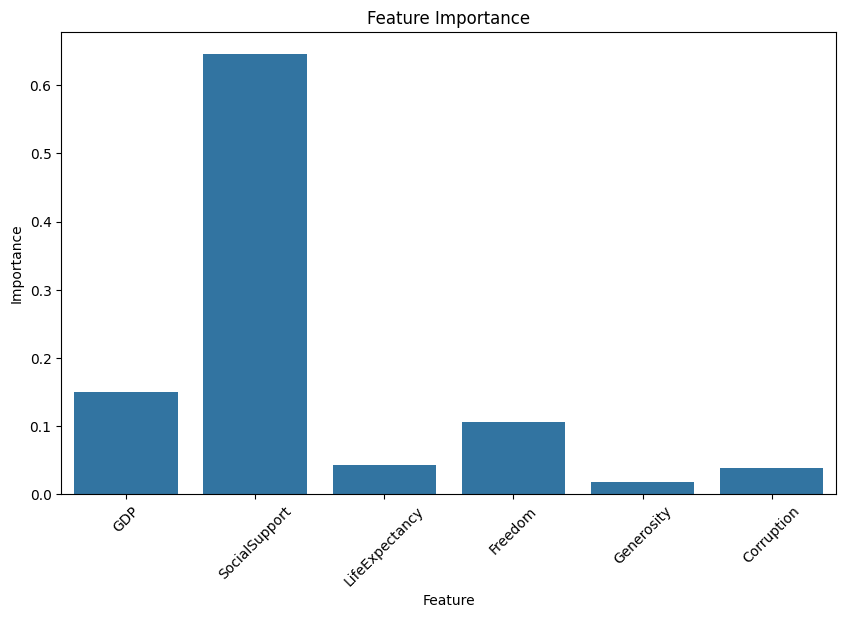

In [9]:
# Feature Importance (Random Forest)
feature_importances = model.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Predict Happiness for Ukraine (Random Forest)
x = ukraine_data.copy()
X_ukraine = x.drop(columns=['HappinessScore']).values.reshape(1, -1)
predicted_happiness_ukraine = model.predict(X_ukraine)

print(f'Predicted happiness for Ukraine: {predicted_happiness_ukraine[0]}')

Predicted happiness for Ukraine: 5.538210000000004


/Users/admin/Desktop/Projects/HappyLens_NN/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
# Sensitivity Analysis (Random Forest)

# Create new data for hypothetical changes
ukraine_data_gdp_up = ukraine_data.copy()
ukraine_data_gdp_up['GDP'] *= 1.1  # Increase GDP by 10%

ukraine_data_social_up = ukraine_data.copy()
ukraine_data_social_up['SocialSupport'] += 0.1  # Increase Social support by 0.1

ukraine_data_freedom_up = ukraine_data.copy()
ukraine_data_freedom_up['Freedom'] += 0.1  # Increase freedom by 0.1

# Predict again with the changes
predicted_happiness_gdp_up = model.predict(ukraine_data_gdp_up.drop(columns=['HappinessScore']).values.reshape(1, -1))
predicted_happiness_social_up = model.predict(ukraine_data_social_up.drop(columns=['HappinessScore']).values.reshape(1, -1))
predicted_happiness_freedom_up = model.predict(ukraine_data_freedom_up.drop(columns=['HappinessScore']).values.reshape(1, -1))

print(f'Predicted happiness for Ukraine with 10% increase in GDP: {predicted_happiness_gdp_up[0]}')
print(f'Predicted happiness for Ukraine with Social support increase: {predicted_happiness_social_up[0]}')
print(f'Predicted happiness for Ukraine with Freedom increase: {predicted_happiness_freedom_up[0]}')


Predicted happiness for Ukraine with 10% increase in GDP: 5.593820000000001
Predicted happiness for Ukraine with Social support increase: 5.646490000000003
Predicted happiness for Ukraine with Freedom increase: 5.88409


/Users/admin/Desktop/Projects/HappyLens_NN/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/admin/Desktop/Projects/HappyLens_NN/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/admin/Desktop/Projects/HappyLens_NN/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


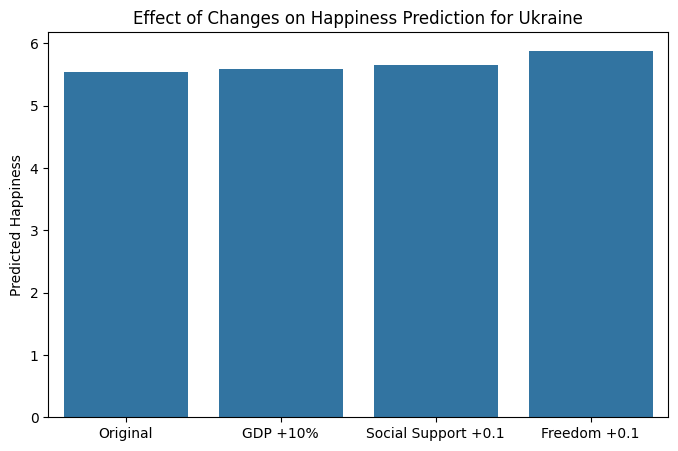

In [12]:
# Visualize the changes
# Create a bar plot for the original and modified predictions
labels = ['Original', 'GDP +10%', 'Social Support +0.1', 'Freedom +0.1']
values = [predicted_happiness_ukraine[0], predicted_happiness_gdp_up[0], predicted_happiness_social_up[0], predicted_happiness_freedom_up[0]]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values)
plt.title('Effect of Changes on Happiness Prediction for Ukraine')
plt.ylabel('Predicted Happiness')
plt.show()



### Train Linear Regression Model

In [13]:
# Define Features and Target
features = ['GDP', 'SocialSupport', 'LifeExpectancy',
            'Freedom', 'Generosity', 'Corruption']
target = 'HappinessScore'


X = df[features]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
x = ukraine_data.copy()
X_ukraine = x.drop(columns=['HappinessScore'])
X_ukraine


,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
109,1.328,1.472,0.472,0.689,0.245,0.023


In [15]:
# Predict for Ukraine
ukraine_lr_pred = lr_model.predict(X_ukraine)[0]

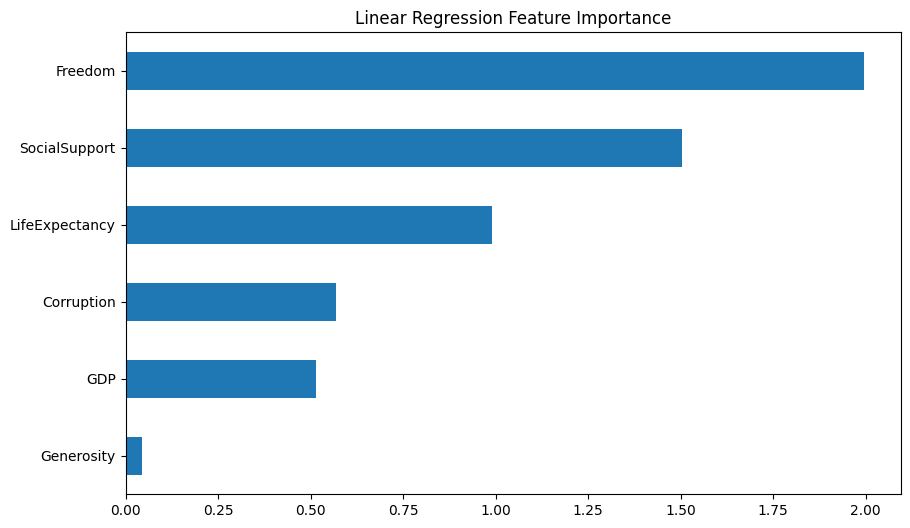

In [16]:
# Get feature importances (coefficients)
lr_importance = pd.Series(lr_model.coef_, index=X_train.columns)

# Sort for visualization
lr_importance_sorted = lr_importance.abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
lr_importance_sorted.plot(kind='barh', title='Linear Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()



In [17]:
print(f'Predicted Happiness Score for Ukraine (Linear Regression): {ukraine_lr_pred:.2f}')

Predicted Happiness Score for Ukraine (Linear Regression): 5.52


Linear Regression – Україна з +10% GDP: 5.59
Linear Regression – Україна з +0.1 Social support: 5.67
Linear Regression – Україна з +0.1 Freedom: 5.72


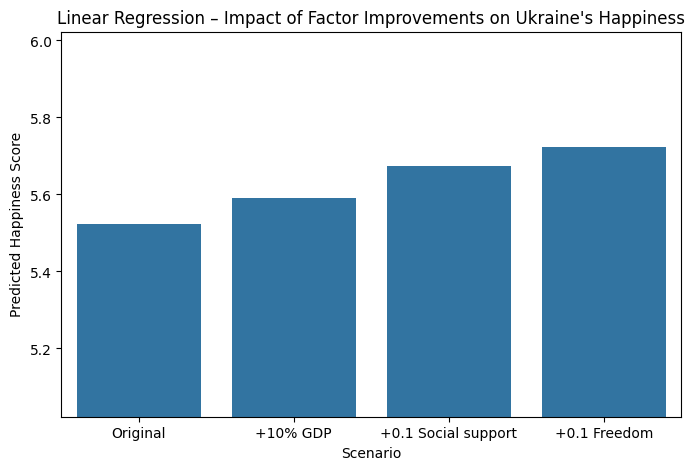

In [18]:
# Sensitivity analysis: hypothetical improvement
ukraine_improved_linreg = X_ukraine.copy()

# Hypothesis: Increase in GDP by 10%
ukraine_improved_linreg_gdp = ukraine_improved_linreg.copy()
ukraine_improved_linreg_gdp['GDP'] *= 1.10
ukraine_pred_gdp_linreg = lr_model.predict(ukraine_improved_linreg_gdp)[0]

# Hypothesis: Increase Social support by 0.1
ukraine_improved_linreg_ss = ukraine_improved_linreg.copy()
ukraine_improved_linreg_ss['SocialSupport'] += 0.1
ukraine_pred_ss_linreg = lr_model.predict(ukraine_improved_linreg_ss)[0]

# Hypothesis: Increase Freedom by 0.1
ukraine_improved_linreg_f = ukraine_improved_linreg.copy()
ukraine_improved_linreg_f['Freedom'] += 0.1
ukraine_pred_f_linreg = lr_model.predict(ukraine_improved_linreg_f)[0]

print(f"Linear Regression – Україна з +10% GDP: {ukraine_pred_gdp_linreg:.2f}")
print(f"Linear Regression – Україна з +0.1 Social support: {ukraine_pred_ss_linreg:.2f}")
print(f"Linear Regression – Україна з +0.1 Freedom: {ukraine_pred_f_linreg:.2f}")

# Visualization of changes
linreg_scenario_df = pd.DataFrame({
    'Scenario': ['Original', '+10% GDP', '+0.1 Social support', '+0.1 Freedom'],
    'Predicted Happiness Score': [
        ukraine_lr_pred,
        ukraine_pred_gdp_linreg,
        ukraine_pred_ss_linreg,
        ukraine_pred_f_linreg
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Scenario', y='Predicted Happiness Score', data=linreg_scenario_df)
plt.ylim(ukraine_lr_pred - 0.5, ukraine_lr_pred + 0.5)
plt.title('Linear Regression – Impact of Factor Improvements on Ukraine\'s Happiness')
plt.ylabel('Predicted Happiness Score')
plt.show()

In [19]:
# Evaluate model performance - Random Forest
rf_train_preds = model.predict(X_train)
rf_val_preds = model.predict(X_val)
rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_val_mse = mean_squared_error(y_val, rf_val_preds)

# Evaluate model performance - Linear Regression
lr_train_preds = lr_model.predict(X_train)
lr_val_preds = lr_model.predict(X_val)
lr_train_mse = mean_squared_error(y_train, lr_train_preds)
lr_val_mse = mean_squared_error(y_val, lr_val_preds)


comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'Training MSE': [rf_train_mse, lr_train_mse],
    'Validation MSE': [rf_val_mse, lr_val_mse],
    'Predicted Happiness for Ukraine': [predicted_happiness_ukraine[0], ukraine_lr_pred],
})

print('\n--- Model Comparison ---')
print(comparison_df)

print('Actual Happiness Score for Ukraine in 2024:', ukraine_data['HappinessScore'].values[0])


--- Model Comparison ---
               Model  Training MSE  Validation MSE  \
0      Random Forest      0.051074        0.247116   
1  Linear Regression      0.232168        0.191318   

   Predicted Happiness for Ukraine  
0                         5.538210  
1                         5.522747  
Actual Happiness Score for Ukraine in 2024: 4.68


- Random Forest has a low training MSE but a significantly worse validation MSE — this is a clear sign of overfitting.
- Linear Regression is a simpler model with a higher training MSE, but it generalizes better (lower validation MSE), making it less prone to overfitting.
Conclusion: On the validation set, Linear Regression performs better despite looking worse on the training data.

Both models overpredict Ukraine’s happiness score by nearly +0.85 points. This suggests the model was trained on countries with generally higher scores, which raises its baseline slightly.

Next, we’ll try another model — GradientBoostingRegressor. It’s often more accurate, works well with small tabular datasets like the World Happiness Report, can model non-linear relationships between features, and tends to be less prone to overfitting than Random Forest.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [21]:
# Evaluation
gbr_train_preds = gbr_model.predict(X_train)
gbr_val_preds = gbr_model.predict(X_val)
gbr_train_mse = mean_squared_error(y_train, gbr_train_preds)
gbr_val_mse = mean_squared_error(y_val, gbr_val_preds)

# Prediction for Ukraine
ukraine_gbr_pred = gbr_model.predict(X_ukraine)[0]

In [22]:
# Update comparison table
comparison_df.loc[len(comparison_df.index)] = [
    'Gradient Boosting', gbr_train_mse, gbr_val_mse, ukraine_gbr_pred
]

print('\n--- Updated Model Comparison ---')
print(comparison_df)
print('Actual Happiness Score for Ukraine in 2024:', ukraine_data['HappinessScore'].values[0])


--- Updated Model Comparison ---
               Model  Training MSE  Validation MSE  \
0      Random Forest      0.051074        0.247116   
1  Linear Regression      0.232168        0.191318   
2  Gradient Boosting      0.015304        0.248402   

   Predicted Happiness for Ukraine  
0                         5.538210  
1                         5.522747  
2                         4.981380  
Actual Happiness Score for Ukraine in 2024: 4.68


Gradient Boosting has the lowest training error, but Validation MSE has not improved, even slightly worse than Random Forest - overfitting.
Gradient Boosting produced a forecast closer to the real one for Ukraine:
4.98 vs. 4.68 → The error is smaller (~0.3) than the other models (~0.8).

Let`s try XGBoost

In [24]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluation
xgb_train_preds = xgb_model.predict(X_train)
xgb_val_preds = xgb_model.predict(X_val)
xgb_train_mse = mean_squared_error(y_train, xgb_train_preds)
xgb_val_mse = mean_squared_error(y_val, xgb_val_preds)

# Prediction for Ukraine
ukraine_xgb_pred = xgb_model.predict(X_ukraine)[0]

# Update comparison table
comparison_df.loc[len(comparison_df.index)] = [
    'XGBoost', xgb_train_mse, xgb_val_mse, ukraine_xgb_pred
]

print('\n--- Final Model Comparison ---')
print(comparison_df)



--- Final Model Comparison ---
               Model  Training MSE  Validation MSE  \
0      Random Forest      0.051074        0.247116   
1  Linear Regression      0.232168        0.191318   
2  Gradient Boosting      0.015304        0.248402   
3            XGBoost      0.020651        0.183402   

   Predicted Happiness for Ukraine  
0                         5.538210  
1                         5.522747  
2                         4.981380  
3                         5.255764  


## Conclusion

Four regression models were developed and compared to predict the happiness score of countries using the **World Happiness Report 2024** data:

- **Random Forest Regressor**  
- **Linear Regression**  
- **Gradient Boosting Regressor**  
- **XGBoost Regressor**  

The models were evaluated based on two metrics: **Mean Squared Error (MSE)** on the training and validation sets, and their predicted happiness scores for **Ukraine** were compared with the actual value.

- **XGBoost Regressor** achieved the best overall performance, with the **lowest validation MSE (0.183)** and a reasonable prediction for Ukraine.
- **Gradient Boosting Regressor** had the lowest training error (0.015), but its higher validation error suggests possible overfitting.
- **Linear Regression** performed consistently, though less flexibly, and had the highest training error.
- **Random Forest Regressor** produced competitive results but did not outperform XGBoost.

### Predicted Happiness Score for Ukraine (Actual = 4.68):
- **XGBoost:** 5.26  
- **Gradient Boosting:** 4.98  
- **Linear Regression:** 5.52  
- **Random Forest:** 5.54  

**XGBoost is the most suitable model** among those tested for predicting happiness scores, offering a strong balance between accuracy and generalization.

XGB – Україна з +10% GDP: 5.35
XGB – Україна з +0.1 Social support: 5.46
XGB – Україна з +0.1 Freedom: 5.61


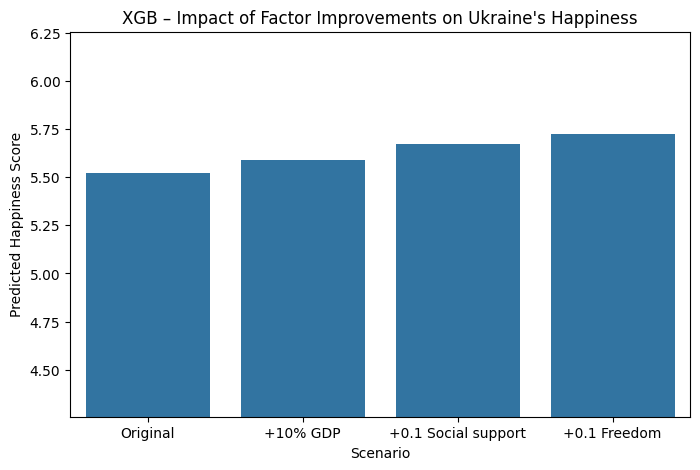

In [25]:
# Sensitivity analysis: hypothetical improvement
ukraine_improved_XGB = X_ukraine.copy()

# Hypothesis
ukraine_improved_XGB_gdp = ukraine_improved_XGB.copy()
ukraine_improved_XGB_gdp['GDP'] *= 1.10
ukraine_pred_gdp_XGB = xgb_model.predict(ukraine_improved_XGB_gdp)[0]

ukraine_improved_XGB_ss = ukraine_improved_XGB.copy()
ukraine_improved_XGB_ss['SocialSupport'] += 0.1
ukraine_pred_ss_XGB = xgb_model.predict(ukraine_improved_XGB_ss)[0]

ukraine_improved_XGB_f = ukraine_improved_XGB.copy()
ukraine_improved_XGB_f['Freedom'] += 0.1
ukraine_pred_f_XGB = xgb_model.predict(ukraine_improved_XGB_f)[0]

print(f"XGB – Україна з +10% GDP: {ukraine_pred_gdp_XGB:.2f}")
print(f"XGB – Україна з +0.1 Social support: {ukraine_pred_ss_XGB:.2f}")
print(f"XGB – Україна з +0.1 Freedom: {ukraine_pred_f_XGB:.2f}")

# Visualization of changes
XGB_scenario_df = pd.DataFrame({
    'Scenario': ['Original', '+10% GDP', '+0.1 Social support', '+0.1 Freedom'],
    'Predicted Happiness Score': [
        ukraine_xgb_pred,
        ukraine_pred_gdp_XGB,
        ukraine_pred_ss_XGB,
        ukraine_pred_f_XGB
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Scenario', y='Predicted Happiness Score', data=linreg_scenario_df)
plt.ylim(ukraine_xgb_pred - 1, ukraine_xgb_pred + 1)
plt.title('XGB – Impact of Factor Improvements on Ukraine\'s Happiness')
plt.ylabel('Predicted Happiness Score')
plt.show()

In [27]:
import json

xgb_results = {
    'model': 'XGBoost',
    'baseline': float(ukraine_xgb_pred),
    'GDP+10%': float(ukraine_pred_gdp_XGB),
    'SocialSupport+0.1': float(ukraine_pred_ss_XGB),
    'Freedom+0.1': float(ukraine_pred_f_XGB)
}

with open('../model_what_if/xgb_scenarios.json', 'w') as f:
    json.dump(xgb_results, f)
